# Unit 3: Deep Q-Learning with Atari Games 👾 using RL Baselines3 Zoo

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit4/thumbnail.jpg" alt="Unit 3 Thumbnail">

In this notebook, **you'll train a Deep Q-Learning agent** playing Space Invaders using [RL Baselines3 Zoo](https://github.com/DLR-RM/rl-baselines3-zoo), a training framework based on [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) that provides scripts for training, evaluating agents, tuning hyperparameters, plotting results and recording videos.

We're using the [RL-Baselines-3 Zoo integration, a vanilla version of Deep Q-Learning](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) with no extensions such as Double-DQN, Dueling-DQN, and Prioritized Experience Replay.

⬇️ Here is an example of what **you will achieve** ⬇️

In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/ThomasSimonini/ppo-SpaceInvadersNoFrameskip-v4/resolve/main/replay.mp4" type="video/mp4"></video>

TODO: ADD TEXT LIVE INFO

TODO: ADD IF YOU HAVE QUESTIONS


###🎮 Environments: 
- SpacesInvadersNoFrameskip-v4 

###📚 RL-Library: 
- [RL-Baselines3-Zoo](https://github.com/DLR-RM/rl-baselines3-zoo)

## Objectives of this notebook 🏆
At the end of the notebook, you will:
- Be able to understand deeper **how RL Baselines3 Zoo works**.
- Be able to **push your trained agent and the code to the Hub** with a nice video replay and an evaluation score 🔥.




## This notebook is from Deep Reinforcement Learning Course
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/deep-rl-course-illustration.jpg" alt="Deep RL Course illustration"/>

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, CleanRL and Sample Factory 2.0.
- 🤖 Train **agents in unique environments** 

And more check 📚 the syllabus 👉 https://simoninithomas.github.io/deep-rl-course

Don’t forget to **<a href="http://eepurl.com/ic5ZUD">sign up to the course</a>** (we are collecting your email to be able to **send you the links when each Unit is published and give you information about the challenges and updates).**


The best way to keep in touch is to join our discord server to exchange with the community and with us 👉🏻 https://discord.gg/ydHrjt3WP5

## Prerequisites 🏗️
Before diving into the notebook, you need to:

🔲 📚 **Study Deep Q-Learning by reading Unit 3**  🤗 ADD LINK 

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the Github Repo](https://github.com/huggingface/deep-rl-class/issues).

# Let's train a Deep Q-Learning agent playing Atari' Space Invaders 👾 and upload it to the Hub.

## Set the GPU 💪
- To **accelerate the agent's training, we'll use a GPU**. To do that, go to `Runtime > Change Runtime type`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step1.jpg" alt="GPU Step 1">

- `Hardware Accelerator > GPU`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step2.jpg" alt="GPU Step 2">

## Create a virtual display 🔽

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames). 

Hence the following cell will install the librairies and create and run a virtual screen 🖥

In [ ]:
%%capture
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

In [ ]:
# Additional dependencies for RL Baselines3 Zoo
!apt-get install swig cmake freeglut3-dev 

In [ ]:
!pip install pyglet==1.5.1

In [ ]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Clone RL-Baselines3 Zoo Repo 📚
You can now directly install from python package `pip install rl_zoo3` but since we want **the full installation with extra environments and dependencies** we're going to clone `RL-Baselines3-Zoo` repository and install from source.

In [ ]:
!git clone https://github.com/DLR-RM/rl-baselines3-zoo

## Install dependencies 🔽
We can now install the dependencies RL-Baselines3 Zoo needs (this can take 5min ⏲)

But we'll also install:
- `huggingface_sb3`: Additional code for Stable-baselines3 to load and upload models from the Hugging Face 🤗 Hub.

In [ ]:
%cd /content/rl-baselines3-zoo/

In [ ]:
!pip install -r requirements.txt

In [ ]:
%%capture
!pip install huggingface_sb3

## Train our Deep Q-Learning Agent to Play Space Invaders 👾

To train an agent with RL-Baselines3-Zoo, we just need to do two things:
1. We define the hyperparameters in `rl-baselines3-zoo/hyperparams/dqn.yml`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit3/hyperparameters.png" alt="DQN Hyperparameters">


Here we see that:
- We use the `Atari Wrapper` that preprocess the input (Frame reduction ,grayscale, stack 4 frames)
- We use `CnnPolicy`, since we use Convolutional layers to process the frames
- We train it for 10 million `n_timesteps` 
- Memory (Experience Replay) size is 100000, aka the amount of experience steps you saved to train again your agent with.

💡 My advice is to **reduce the training timesteps to 1M,** which will take about 90 minutes on a P100. `!nvidia-smi` will tell you what GPU you're using. At 10 million steps, this will take about 9 hours, which could likely result in Colab timing out. I recommend running this on your local computer (or somewhere else). Just click on: `File>Download`. 

In terms of hyperparameters optimization, my advice is to focus on these 3 hyperparameters:
- `learning_rate`
- `buffer_size (Experience Memory size)`
- `batch_size`

As a good practice, you need to **check the documentation to understand what each hyperparameters does**: https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html#parameters



2. We run `train.py` and save the models on `logs` folder 📁

In [ ]:
!python train.py --algo ________ --env SpaceInvadersNoFrameskip-v4  -f _________

#### Solution

In [ ]:
!python train.py --algo dqn  --env SpaceInvadersNoFrameskip-v4 -f logs/

## Let's evaluate our agent 👀
- RL-Baselines3-Zoo provides `enjoy.py` to evaluate our agent.
- Let's evaluate it for 5000 timesteps 🔥

In [ ]:
!python enjoy.py  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --no-render  --n-timesteps _________  --folder logs/

#### Solution

In [ ]:
!python enjoy.py  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --no-render  --n-timesteps 5000  --folder logs/

## Publish our trained model on the Hub 🚀
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit3/space-invaders-model.gif" alt="Space Invaders model">

By using `rl_zoo3.push_to_hub.py` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉  https://huggingface.co/spaces/chrisjay/Deep-Reinforcement-Learning-Leaderboard

To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account to HF ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

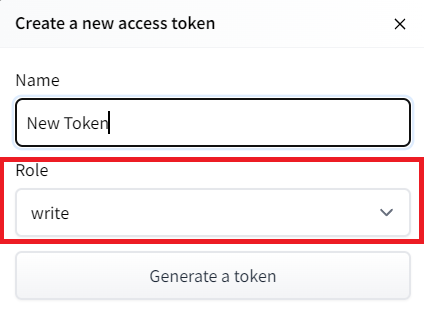

- Copy the token 
- Run the cell below and past the token

In [ ]:
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.
notebook_login()
!git config --global credential.helper store

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥

Let's run push_to_hub.py file to upload our trained agent to the Hub.

`--repo-name `: The name of the repo

`-orga`: Your Hugging Face username

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit3/select-id.png" alt="Select Id">

In [ ]:
!python -m rl_zoo3.push_to_hub  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --repo-name _____________________ -orga _____________________ -f logs/

#### Solution

In [ ]:
!python -m rl_zoo3.push_to_hub  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --repo-name dqn-SpaceInvadersNoFrameskip-v4  -orga ThomasSimonini  -f logs/

###.

Congrats 🥳 you've just trained and uploaded your first Deep Q-Learning agent using RL-Baselines-3 Zoo. The script above should have displayed a link to a model repository such as https://huggingface.co/ThomasSimonini/dqn-SpaceInvadersNoFrameskip-v4. When you go to this link, you can:

- See a **video preview of your agent** at the right. 
- Click "Files and versions" to see all the files in the repository.
- Click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
- A model card (`README.md` file) which gives a description of the model and the hyperparameters you used.

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

**Compare the results of your agents with your classmates** using the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

## Load a powerful trained model 🔥
- The Stable-Baselines3 team uploaded **more than 150 trained Deep Reinforcement Learning agents on the Hub**.

You can find them here: 👉 https://huggingface.co/sb3

Some examples:
- Asteroids: https://huggingface.co/sb3/dqn-AsteroidsNoFrameskip-v4
- Beam Rider: https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4
- Breakout: https://huggingface.co/sb3/dqn-BreakoutNoFrameskip-v4
- Road Runner: https://huggingface.co/sb3/dqn-RoadRunnerNoFrameskip-v4

Let's load an agent playing Beam Rider: https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4

In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4/resolve/main/replay.mp4" type="video/mp4"></video>

1. We download the model using `rl_zoo3.load_from_hub`, and place it in a new folder that we can call `rl_trained`

In [ ]:
# Download model and save it into the logs/ folder
!python -m rl_zoo3.load_from_hub --algo dqn --env BeamRiderNoFrameskip-v4 -orga sb3 -f rl_trained/

2. Let's evaluate if for 5000 timesteps

In [ ]:
!python enjoy.py --algo dqn --env BeamRiderNoFrameskip-v4 -n 5000  -f rl_trained/

Why not trying to train your own **Deep Q-Learning Agent playing BeamRiderNoFrameskip-v4? 🏆.**

If you want to try, check https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4#hyperparameters **in the model card, you have the hyperparameters of the trained agent.**

But finding hyperparameters can be a daunting task. Fortunately, we'll see in the next Unit, how we can **use Optuna for optimizing the Hyperparameters 🔥.**


## Some additional challenges 🏆
The best way to learn **is to try things by your own**!

In the [Leaderboard](https://huggingface.co/spaces/chrisjay/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here's a list of environments you can try to train your agent with:
- BeamRiderNoFrameskip-v4
- BreakoutNoFrameskip-v4 
- EnduroNoFrameskip-v4
- PongNoFrameskip-v4

Also, **if you want to learn to implement Deep Q-Learning by yourself**, you definitely should look at CleanRL implementation: https://github.com/vwxyzjn/cleanrl/blob/master/cleanrl/dqn_atari.py

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit4/atari-envs.gif" alt="Environments"/>

________________________________________________________________________
Congrats on finishing this chapter!

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and having a solid foundations.

In the next unit, **we’re going to learn about [Optuna](https://optuna.org/)**. One of the most critical task in Deep Reinforcement Learning is to find a good set of training hyperparameters. And Optuna is a library that helps you to automate the search.






### This is a course built with you 👷🏿‍♀️

Finally, we want to improve and update the course iteratively with your feedback. If you have some, please fill this form 👉 https://forms.gle/3HgA7bEHwAmmLfwh9

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the Github Repo](https://github.com/huggingface/deep-rl-class/issues).

See you on [Bonus unit 2](https://github.com/huggingface/deep-rl-class/tree/main/unit2#unit-2-introduction-to-q-learning)! 🔥 TODO CHANGE LINK

### Keep Learning, Stay Awesome 🤗